In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns



In [4]:
map_df = gpd.read_file("./file/Indian_States.shp")
df = pd.read_csv("./child-crime.csv")
cyber_data  = pd.read_csv("cyber-crime.csv")
cac_data = pd.read_csv("./CAC_T.csv")
illiterates_data = pd.read_csv("./Illiteracy-rate.csv")
enrolment_data = pd.read_csv("./enrolment.csv")



df.rename({"States/UTs": "state", "Crime Head": "crime", "2014": "numberOfCrimes"}, axis=1, inplace=True)
df["year"]  = pd.Series([2014 for x in range(len(df.index))])

In [5]:
statesAndUts = df["state"].unique()

In [6]:
total_crimes = []
for i in range (0, len(statesAndUts) - 1):
    total =  df.loc[df['state'] == statesAndUts[i], 'numberOfCrimes'].sum()
    total_crimes.append([statesAndUts[i], total])

t_df = pd.DataFrame(total_crimes, columns = ['State/UTs','no_of_crimes'])
t_df.to_csv("crime.csv")


CRIME AGAINST CHILDREN IN INDIA.


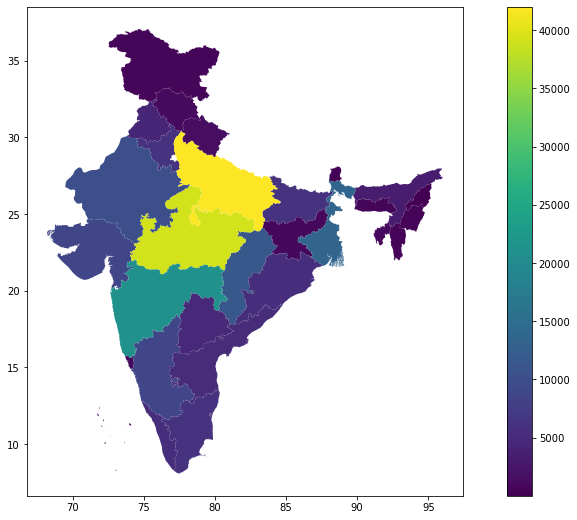

In [7]:
map_df.rename(columns = {'st_nm':'States/UTs'}, inplace = True)
merged_df = map_df.set_index('States/UTs').join(t_df.set_index('State/UTs')) 
print("CRIME AGAINST CHILDREN IN INDIA.")
merged_df.plot('no_of_crimes', figsize = (16, 9), legend = True)
plt.savefig("overall.png")


In [8]:
def compute_mode(line_object):
    x = line_object.get_xdata()
    y = line_object.get_ydata()
    mode_idx = y.argmax()
    return x[mode_idx], y[mode_idx]

In [9]:
cac_cols = cac_data.columns

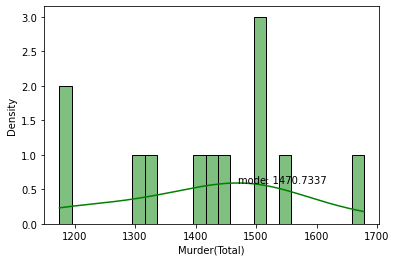

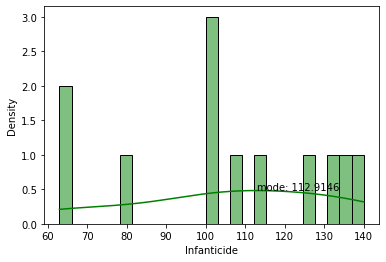

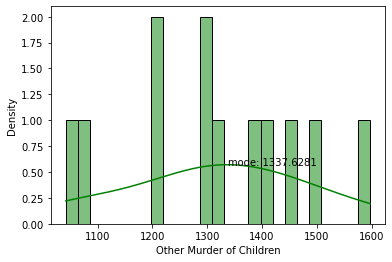

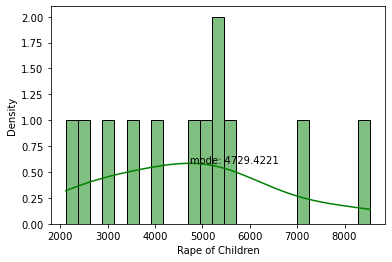

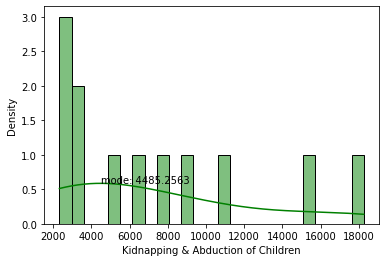

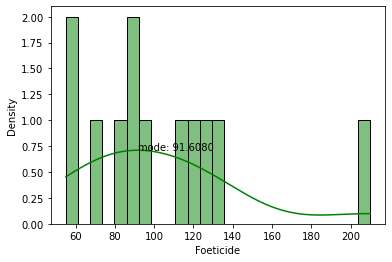

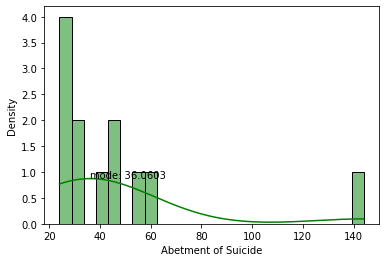

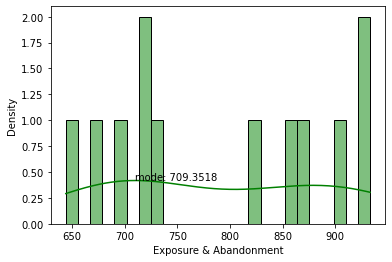

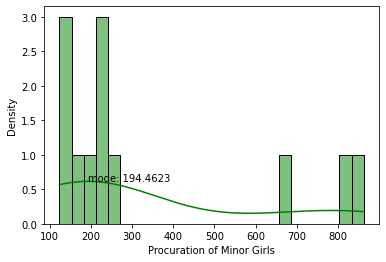

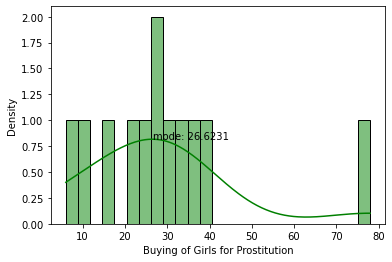

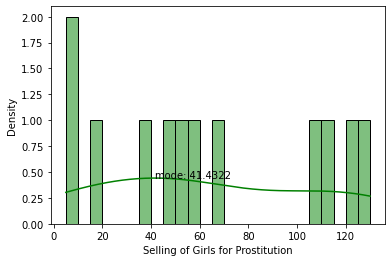

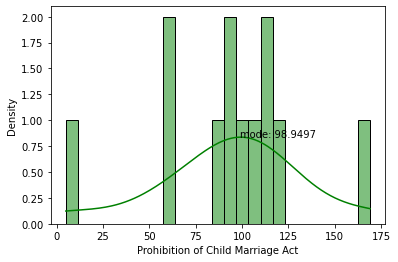

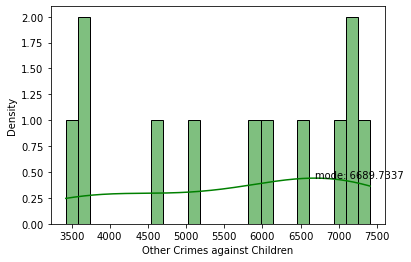

In [10]:
def make_density(layer_list, color, col):
    # Draw the histogram and fit a density plot.
    ax = sns.histplot(layer_list, kde=True, bins=25,
                      color=color)
    # compute mode of the histogram.
    mode_x, mode_y = compute_mode(ax.lines[0])

    # draw a vertical line at the mode of the histogram.
    ax.text(mode_x, mode_y, 'mode: {:.4f}'.format(mode_x))
    # Plot formatting
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

for i in range(1, len(cac_cols) - 1):
    make_density(cac_data[cac_cols[i]], 'green', cac_cols[i])
    plt.show()

In [11]:
cyber_states = cyber_data["State/UT (Col. 2)"]
total_crime_state_wise  = cyber_data.sum(axis=1, numeric_only=True)
total_cyber_crimes = pd.DataFrame(list(zip(cyber_states, total_crime_state_wise)), columns =['state', 'total_crime']) 
total_cyber_crimes


,state,total_crime
0,Andhra Pradesh,104
1,Arunachal Pradesh,0
2,Assam,90
3,Bihar,2
4,Chhattisgarh,42
5,Goa,6
6,Gujarat,64
7,Haryana,66
8,Himachal Pradesh,38
9,Jharkhand,8


CYBER CRIME IN INDIA


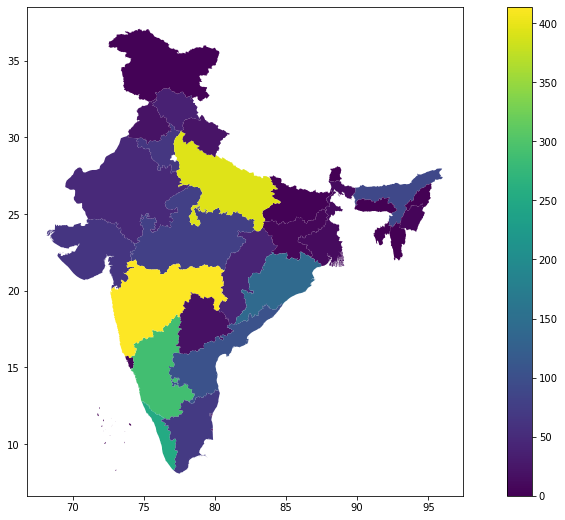

In [12]:
merged_df = map_df.set_index('States/UTs').join(total_cyber_crimes.set_index('state')) 
print("CYBER CRIME IN INDIA")
merged_df.plot('total_crime', figsize = (16, 9), legend = True)
plt.savefig("overall.png")


CYBER CRIME IN INDIA


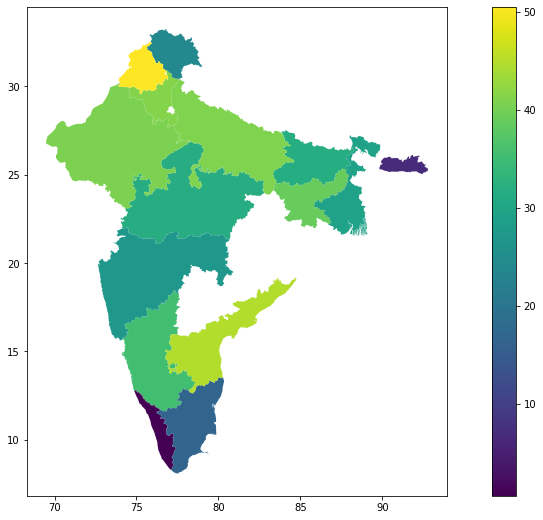

In [16]:
merged_df = map_df.set_index('States/UTs').join(illiterates_data.set_index('States')) 
print("Literacy reate in INDIA")
merged_df.plot('Illiterates (in percent)', figsize = (16, 9), legend = True)
plt.savefig("literacy.png")


Literacy rate for primary students in INDIA


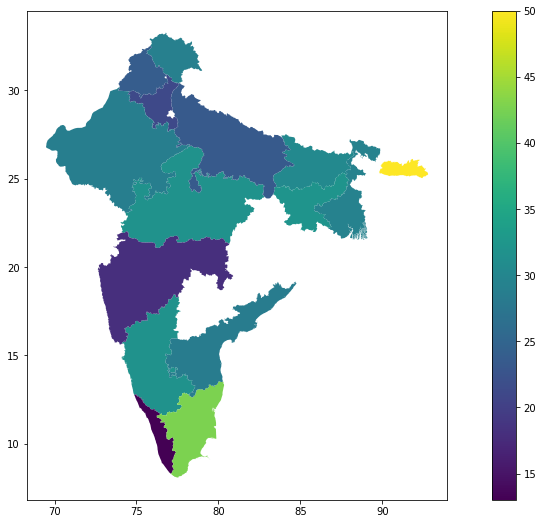

In [17]:
print("Literacy rate for primary students in INDIA")
merged_df.plot('Primary(in percent)', figsize = (16, 9), legend = True)
plt.savefig("primary.png")


Literacy rate for primary students in INDIA


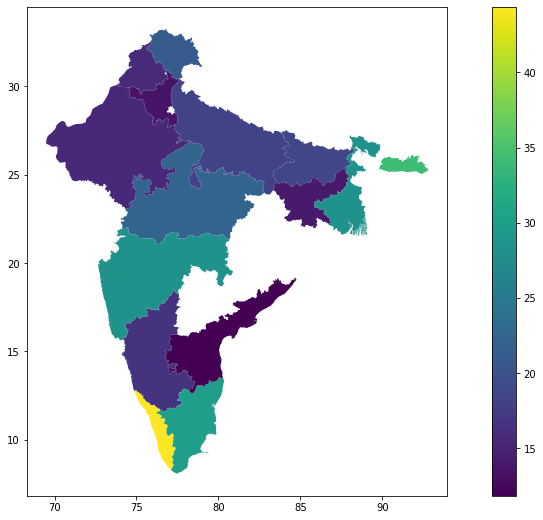

In [18]:
print("Literacy rate for middle students in INDIA")
merged_df.plot('Middle (in percent)', figsize = (16, 9), legend = True)
plt.savefig("middle.png")


Literacy rate for primary students in INDIA


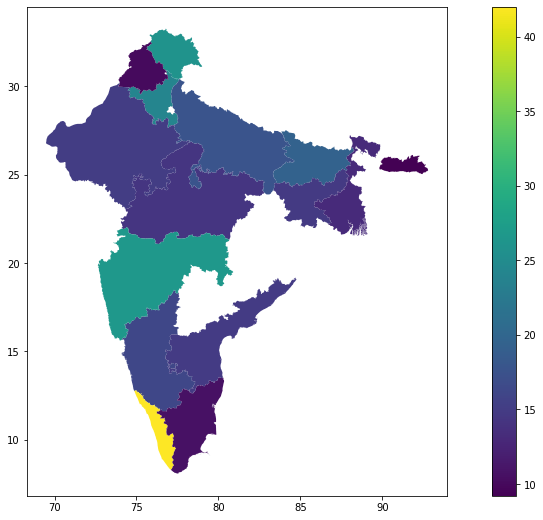

In [19]:
print("Literacy rate for above metrics students in INDIA")
merged_df.plot('Matric & Above (in percent)', figsize = (16, 9), legend = True)
plt.savefig("above-metric.png")
